HW2 - standard-identification-deeplearning



SubHW2-2: Multivariate Gaussian Sample Generation

This part generates synthetic 2D samples for two different classes using numpy.random.multivariate_normal.

Each class has its own mean vector and covariance matrix.

Random samples are drawn separately for both classes.

The samples are visualized in a 2D scatter plot using matplotlib.

This setup is useful for testing classification algorithms on controlled, simulated data.




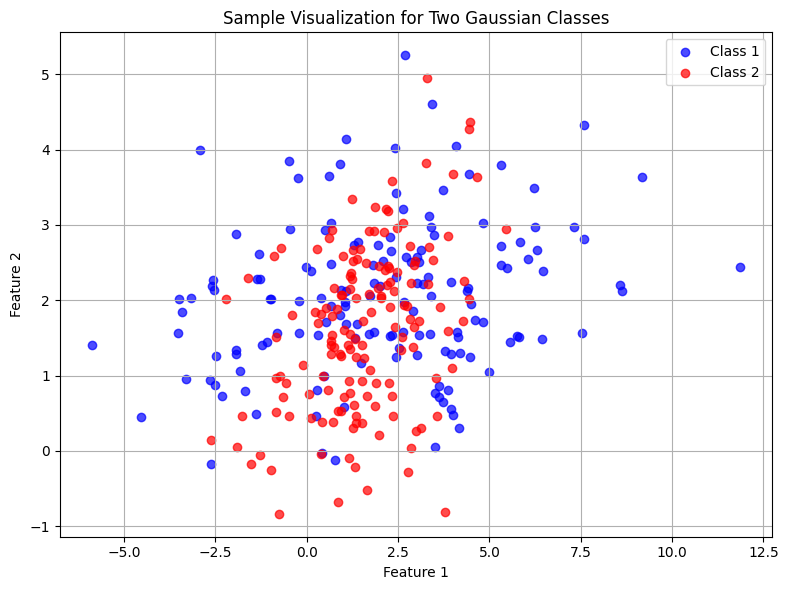

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples per class
num_samples = 150

# Class 1: mean and covariance
mean_w1 = np.array([2, 2])
cov_w1 = np.array([[8, 0.5], [0.5, 1]])

# Class 2: mean and covariance
mean_w2 = np.array([1.8, 1.8])
cov_w2 = np.array([[2, 0.5], [0.5, 1]])

# Generate random samples from multivariate normal distribution
samples_w1 = np.random.multivariate_normal(mean_w1, cov_w1, num_samples)
samples_w2 = np.random.multivariate_normal(mean_w2, cov_w2, num_samples)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.scatter(samples_w1[:, 0], samples_w1[:, 1], label='Class 1', color='blue', alpha=0.7)
plt.scatter(samples_w2[:, 0], samples_w2[:, 1], label='Class 2', color='red', alpha=0.7)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sample Visualization for Two Gaussian Classes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


A. Code Description – Perceptron Training

The code below performs the following steps:

It first assigns labels to the generated samples from the two classes.

It separates the feature vectors (X_train) from the class labels (y_train).

It defines a Perceptron model using a custom Perceptron class.

The model is trained using the train_batch_perceptron function, which updates the weights and bias of the perceptron based on the training data, for a specified number of epochs and learning rate.

It then computes the classification accuracy of the model on the training set.

Finally, it visualizes the decision boundary using the plot_boundary function, overlaying it on the scatter plot of the class samples.



Epoch 1 - Weights: [-3.23117627  3.26173015], Bias: 5.5
Epoch 2 - Weights: [-2.37832559  1.45714026], Bias: 5.5
Epoch 3 - Weights: [-3.05538834  3.76781153], Bias: 4.4
Epoch 4 - Weights: [-2.5478923   0.45257844], Bias: 5.5
Epoch 5 - Weights: [-3.22357852  1.94292051], Bias: 6.6
Epoch 6 - Weights: [-3.46202172  1.215908  ], Bias: 5.5
Epoch 7 - Weights: [-2.26440721  2.1713373 ], Bias: 4.4
Epoch 8 - Weights: [-2.89890116  3.0149402 ], Bias: 3.3000000000000003
Epoch 9 - Weights: [-3.147253    1.56531732], Bias: 4.4
Epoch 10 - Weights: [-2.5146007   2.64389948], Bias: 4.4
Epoch 11 - Weights: [-1.61809856 -0.6618176 ], Bias: 4.4
Epoch 12 - Weights: [-2.85917757  2.04981745], Bias: 5.5
Epoch 13 - Weights: [-4.23481322  1.8847181 ], Bias: 5.5
Epoch 14 - Weights: [-2.97992241  1.05083386], Bias: 4.4
Epoch 15 - Weights: [-3.80930817  2.60821972], Bias: 4.4
Epoch 16 - Weights: [-2.10845125  1.89094829], Bias: 4.4
Epoch 17 - Weights: [-3.37251164  2.07034057], Bias: 6.6000000000000005
Epoch 18 -

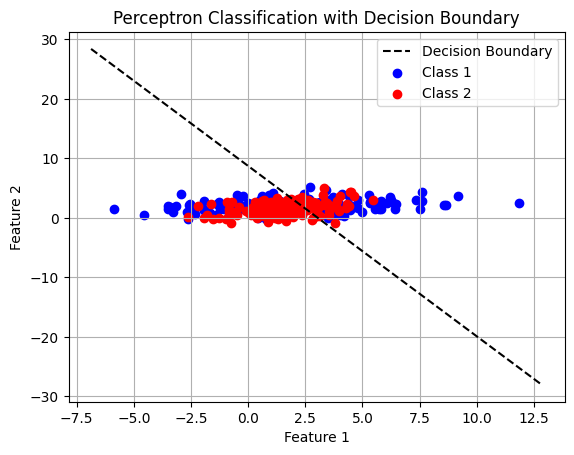

In [9]:

# Assign class labels
class_1_label = np.zeros((num_samples, 1))  # Class 1 → label 0
class_2_label = np.ones((num_samples, 1))   # Class 2 → label 1

# Combine samples and labels into a single dataset
data_with_labels = np.column_stack((
    np.vstack((samples_w1, samples_w2)),
    np.vstack((class_1_label, class_2_label))
))

# Shuffle dataset
np.random.shuffle(data_with_labels)

# Split into features and labels
X_train = data_with_labels[:, :2]
y_train = data_with_labels[:, 2]

# Define Perceptron model
class Perceptron:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0.0

    def forward(self, x):
        activation = np.dot(self.weights, x) + self.bias
        return 1 if activation > 0 else 0

    def update(self, x, true_label):
        prediction = self.forward(x)
        error = true_label - prediction
        self.bias += error
        self.weights += error * x
        return error

# Batch Perceptron training
def train_batch_perceptron(model, X, y, epochs=100, learning_rate=0.1):
    for epoch in range(epochs):
        weight_update = np.zeros(model.weights.shape)
        bias_update = 0
        for xi, yi in zip(X, y):
            error = model.update(xi, yi)
            bias_update += error
            weight_update += error * xi
        model.bias += learning_rate * bias_update
        model.weights += learning_rate * weight_update
        print(f"Epoch {epoch + 1} - Weights: {model.weights}, Bias: {model.bias}")

# Train the model
pnn = Perceptron(num_features=2)
train_batch_perceptron(pnn, X_train, y_train, epochs=100, learning_rate=0.1)

# Compute training accuracy
def compute_accuracy(model, X, y):
    correct = sum(model.forward(xi) == yi for xi, yi in zip(X, y))
    return correct / len(y)

accuracy = compute_accuracy(pnn, X_train, y_train)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundary
def plot_decision_boundary(model, X):
    w1, w2 = model.weights
    b = model.bias
    x_vals = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])
    y_vals = (-w1 * x_vals - b) / w2
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")

# Visualize decision boundary with data
plot_decision_boundary(pnn, X_train)
plt.scatter(samples_w1[:, 0], samples_w1[:, 1], label='Class 1', c='blue')
plt.scatter(samples_w2[:, 0], samples_w2[:, 1], label='Class 2', c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Classification with Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


(B) Support Vector Machine (SVM) Classification

This part uses Support Vector Machines (SVM) from the scikit-learn library to build a linear classifier and visualize its decision boundary.

The dataset is first split into training and test sets using the train_test_split function. Then, a linear SVM model is created using svm.SVC(kernel='linear'). This model is trained on the training data using svm_model.fit().

After training, predictions are made on the test set using svm_model.predict(), and the accuracy is calculated by comparing predictions with ground truth labels.

Finally, the decision boundary learned by the SVM is visualized using a helper function called plot_decision_boundary.

This demonstrates how a linear SVM performs on the same synthetic dataset that was used in the perceptron example.

Training Accuracy: 57.50%
Test Accuracy: 56.67%


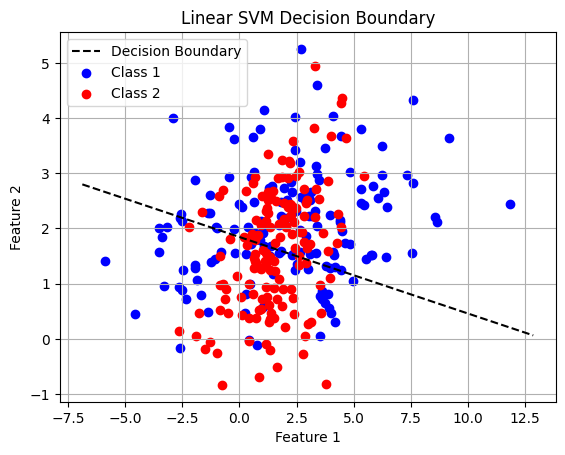

In [10]:
# ----------- Import required libraries -----------
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ----------- Prepare labeled data -----------
class_1_label = np.zeros((num_samples, 1))  # Label 0 for class 1
class_2_label = np.ones((num_samples, 1))   # Label 1 for class 2

# Stack samples and labels together
all_samples = np.vstack((samples_w1, samples_w2))
all_labels = np.vstack((class_1_label, class_2_label))
data = np.column_stack((all_samples, all_labels))

# Shuffle the dataset
np.random.seed(42)
shuffled_indices = np.random.permutation(len(data))
data = data[shuffled_indices]

# Split features and labels
X = data[:, :2]  # Feature columns (x1, x2)
y = data[:, 2]   # Label column

# ----------- Train-test split -----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------- Train SVM classifier -----------
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# ----------- Evaluate performance -----------
train_acc = accuracy_score(y_train, svm_model.predict(X_train))
test_acc = accuracy_score(y_test, svm_model.predict(X_test))

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# ----------- Plot decision boundary -----------
def plot_decision_boundary(model, X, label="Decision Boundary"):
    w = model.coef_[0]
    b = model.intercept_[0]

    # Select x1 range
    x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

    # Avoid division by zero in case w[1] is 0
    if w[1] != 0:
        x2_vals = (-w[0] * x1_vals - b) / w[1]
        plt.plot(x1_vals, x2_vals, 'k--', label=label)
    else:
        # Vertical line (not common for 2D SVMs)
        x_val = -b / w[0]
        plt.axvline(x=x_val, color='k', linestyle='--', label=label)


# ----------- Visualization -----------
plot_decision_boundary(svm_model, X)
plt.scatter(samples_w1[:, 0], samples_w1[:, 1], color='blue', label='Class 1')
plt.scatter(samples_w2[:, 0], samples_w2[:, 1], color='red', label='Class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()
